In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import os
print(os.getcwd())

C:\Users\User


In [19]:
# Load Excel file, specifying the correct sheet
file_path = r"C:\Users\User\Downloads\Documents\School-Age-Digital-Connectivity Dataset.xlsx"

# read with first two rows as a multi-row header
df_multi = pd.read_excel(file_path, sheet_name="Total school age", header=[0,1])

#Flatten the multi-row headers
df_multi.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_multi.columns]

# Check the new column names
df_multi.columns

Index(['ISO3_Unnamed: 0_level_1', 'Countries and areas_Unnamed: 1_level_1',
       'Region_Unnamed: 2_level_1', 'Sub-region_UNICEF Sub-region 1',
       'Income Group_Unnamed: 4_level_1', 'Total_Unnamed: 5_level_1',
       'Residence_Rural', 'Residence_Urban', 'Wealth quintile_Poorest',
       'Wealth quintile_Richest', 'Source_Data source', 'Source_Time period'],
      dtype='object')

In [20]:
df_multi.head(6)

,ISO3_Unnamed: 0_level_1,Countries and areas_Unnamed: 1_level_1,Region_Unnamed: 2_level_1,Sub-region_UNICEF Sub-region 1,Income Group_Unnamed: 4_level_1,Total_Unnamed: 5_level_1,Residence_Rural,Residence_Urban,Wealth quintile_Poorest,Wealth quintile_Richest,Source_Data source,Source_Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),0.237807,0.091202,0.322005,0.005888,0.772502,Multiple Indicator Cluster Survey,2018-19
1,AGO,Angola,SSA,ESA,Lower middle income (LM),0.165507,0.017646,0.243431,0.000000,0.624589,Demographic and Health Survey,2015-16
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.398849,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.809218,0.709329,0.883609,0.466020,0.991219,Demographic and Health Survey,2015-16
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.366474,0.327793,0.516416,0.087617,0.758899,Multiple Indicator Cluster Survey,2019
5,BRB,Barbados,LAC,LAC,High income (H),0.659729,0.612351,0.685897,0.100025,0.979503,Multiple Indicator Cluster Survey,2012


In [21]:
# Check missing values
df_multi.isnull().sum()

ISO3_Unnamed: 0_level_1                    0
Countries and areas_Unnamed: 1_level_1     0
Region_Unnamed: 2_level_1                  0
Sub-region_UNICEF Sub-region 1             0
Income Group_Unnamed: 4_level_1            0
Total_Unnamed: 5_level_1                   0
Residence_Rural                           10
Residence_Urban                            7
Wealth quintile_Poorest                   17
Wealth quintile_Richest                   18
Source_Data source                         0
Source_Time period                         0
dtype: int64

In [34]:
#filling in missing values
df_multi.fillna(0, inplace=True)
df_multi.head(6)

,ISO3_Unnamed: 0_level_1,Countries and areas_Unnamed: 1_level_1,Region_Unnamed: 2_level_1,Sub-region_UNICEF Sub-region 1,Income Group_Unnamed: 4_level_1,Total_Unnamed: 5_level_1,Residence_Rural,Residence_Urban,Wealth quintile_Poorest,Wealth quintile_Richest,Source_Data source,Source_Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),0.237807,0.091202,0.322005,0.005888,0.772502,Multiple Indicator Cluster Survey,2018-19
1,AGO,Angola,SSA,ESA,Lower middle income (LM),0.165507,0.017646,0.243431,0.000000,0.624589,Demographic and Health Survey,2015-16
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.398849,0.000000,0.000000,0.000000,0.000000,Multiple Indicator Cluster Survey,2011-12
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.809218,0.709329,0.883609,0.466020,0.991219,Demographic and Health Survey,2015-16
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.366474,0.327793,0.516416,0.087617,0.758899,Multiple Indicator Cluster Survey,2019
5,BRB,Barbados,LAC,LAC,High income (H),0.659729,0.612351,0.685897,0.100025,0.979503,Multiple Indicator Cluster Survey,2012


In [23]:
# Check shape (rows x columns)
df_multi.shape

(87, 12)

In [24]:
# Quick summary statistics
df_multi.describe()

,Total_Unnamed: 5_level_1,Residence_Rural,Residence_Urban,Wealth quintile_Poorest,Wealth quintile_Richest
count,87.000000,87.000000,87.000000,87.000000,87.000000
mean,0.356033,0.239686,0.403979,0.148658,0.496441
std,0.295594,0.280904,0.308394,0.242943,0.400908
min,0.003246,0.000000,0.000000,0.000000,0.000000
25%,0.076087,0.011254,0.103339,0.000000,0.035546
50%,0.306607,0.101812,0.381371,0.006740,0.468252
75%,0.605256,0.421581,0.666635,0.181560,0.918803
max,0.993000,0.912665,0.965077,0.888000,1.000000


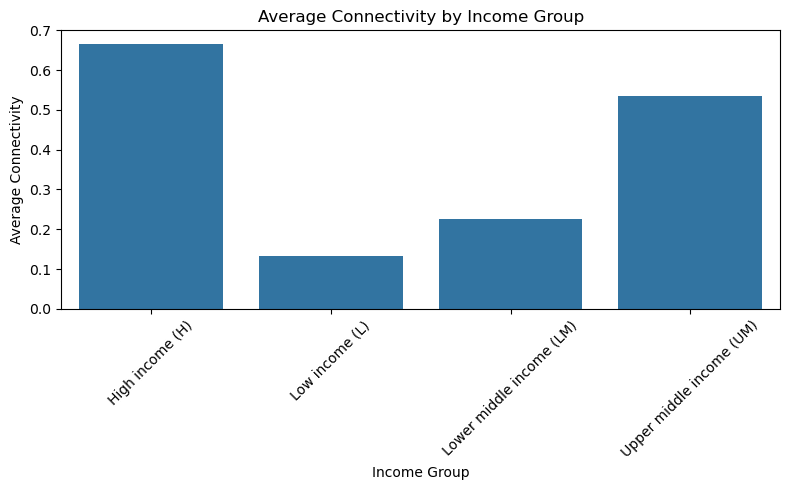

In [31]:
# Visualizing the data
# Average Connectivity by Income Group
# Group by income group and calculate mean of Total
avg_income = df_multi.groupby('Income Group_Unnamed: 4_level_1')['Total_Unnamed: 5_level_1'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_income,
    x='Income Group_Unnamed: 4_level_1',
    y='Total_Unnamed: 5_level_1')
plt.title('Average Connectivity by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Connectivity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

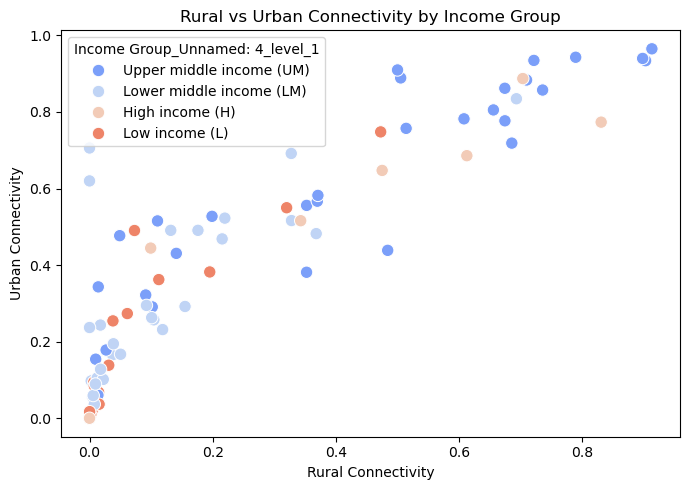

In [28]:
# Comparing Rural vs Urban connectivity
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_multi,
    x='Residence_Rural',
    y='Residence_Urban',
    hue='Income Group_Unnamed: 4_level_1',
    palette='coolwarm',
    s=80
)
plt.title('Rural vs Urban Connectivity by Income Group')
plt.xlabel('Rural Connectivity')
plt.ylabel('Urban Connectivity')
plt.tight_layout()
plt.show()

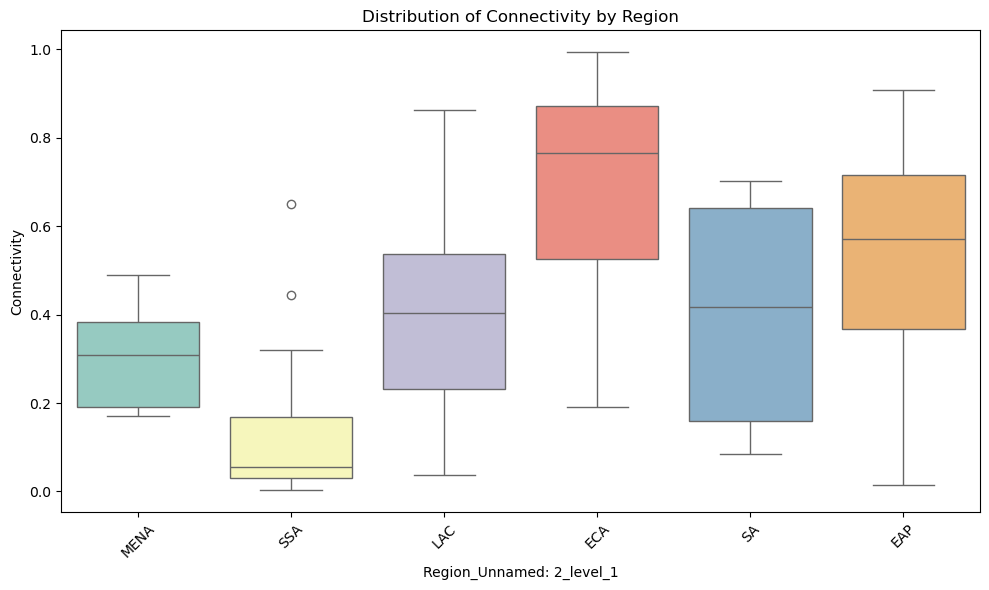

In [33]:
# Distribution of connectivity by region
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_multi,
    x='Region_Unnamed: 2_level_1',
    y='Total_Unnamed: 5_level_1',
    hue='Region_Unnamed: 2_level_1',
    palette='Set3')
plt.title('Distribution of Connectivity by Region')
plt.xticks(rotation=45)
plt.ylabel('Connectivity')
plt.tight_layout()
plt.show()